In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-classification-ham-spam/email_classification.csv


In [72]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

df = pd.read_csv("/kaggle/input/email-classification-ham-spam/email_classification.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   179 non-null    object
 1   label   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [73]:
print(df.head())

                                               email label
0  Upgrade to our premium plan for exclusive acce...   ham
1  Happy holidays from our team! Wishing you joy ...   ham
2  We're hiring! Check out our career opportuniti...   ham
3  Your Amazon account has been locked. Click her...  spam
4  Your opinion matters! Take our survey and help...   ham


In [74]:
# Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['email'])
y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

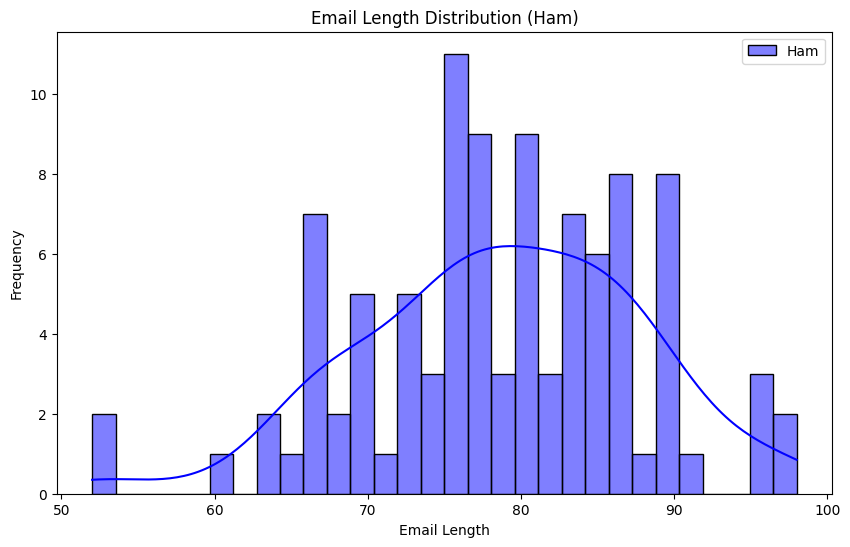

In [75]:
df['email_length'] = df['email'].apply(len)

# Email Length Distribution Plot
plt.figure(figsize=(10,6))
sns.histplot(df[df['label']=='ham']['email_length'], bins=30, color='blue', label='Ham', kde=True)
plt.title('Email Length Distribution (Ham)')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


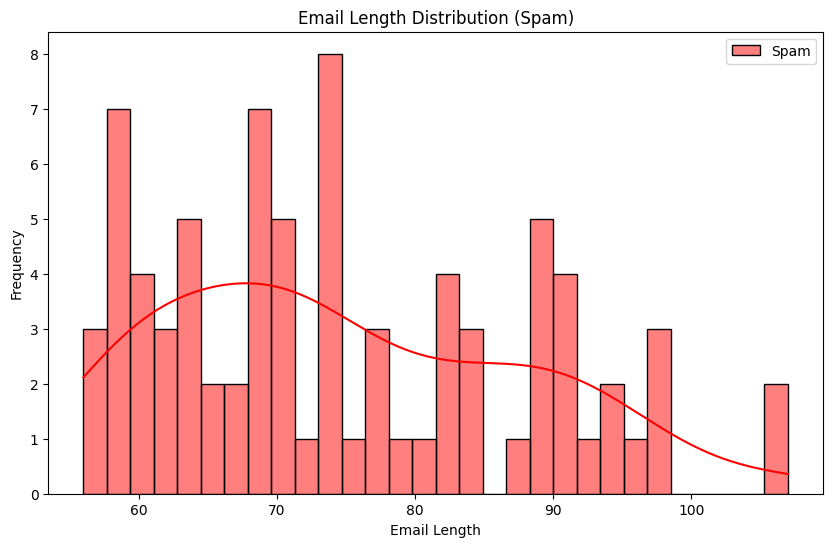

In [76]:
df['email_length'] = df['email'].apply(len)

# Email Length Distribution Plot
plt.figure(figsize=(10,6))
sns.histplot(df[df['label']=='spam']['email_length'], bins=30, color='red', label='Spam', kde=True)
plt.title('Email Length Distribution (Spam)')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


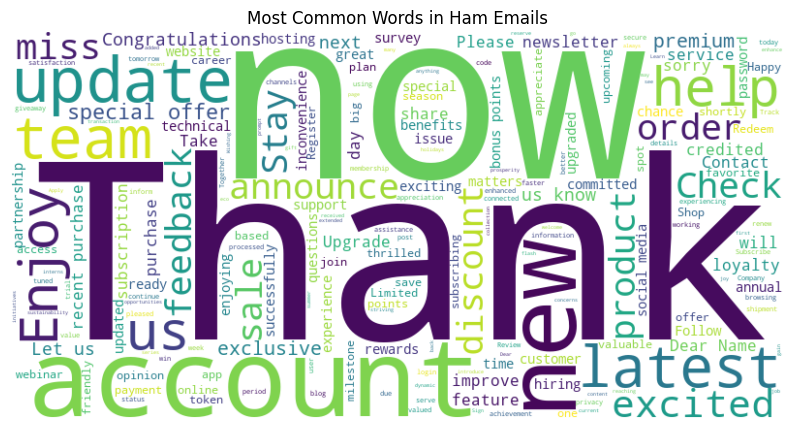

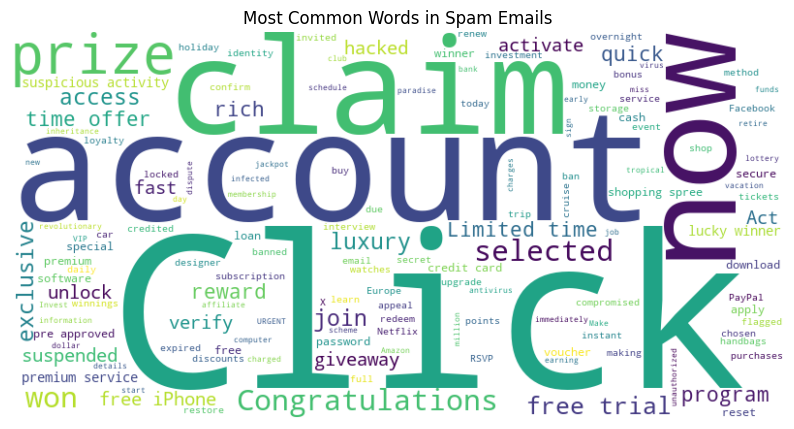

In [77]:
from wordcloud import WordCloud

# Generate word cloud for Ham
ham_words = ' '.join([text for text in df[df['label'] == 'ham']['email']])
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Most Common Words in Ham Emails')
plt.axis('off')
plt.show()

# Generate word cloud for Spam
spam_words = ' '.join([text for text in df[df['label'] == 'spam']['email']])
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Most Common Words in Spam Emails')
plt.axis('off')
plt.show()


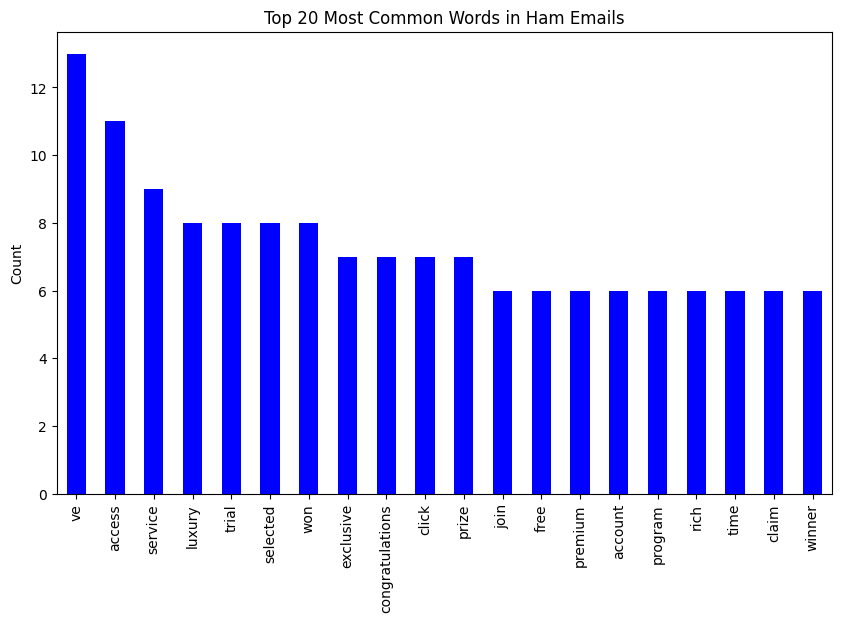

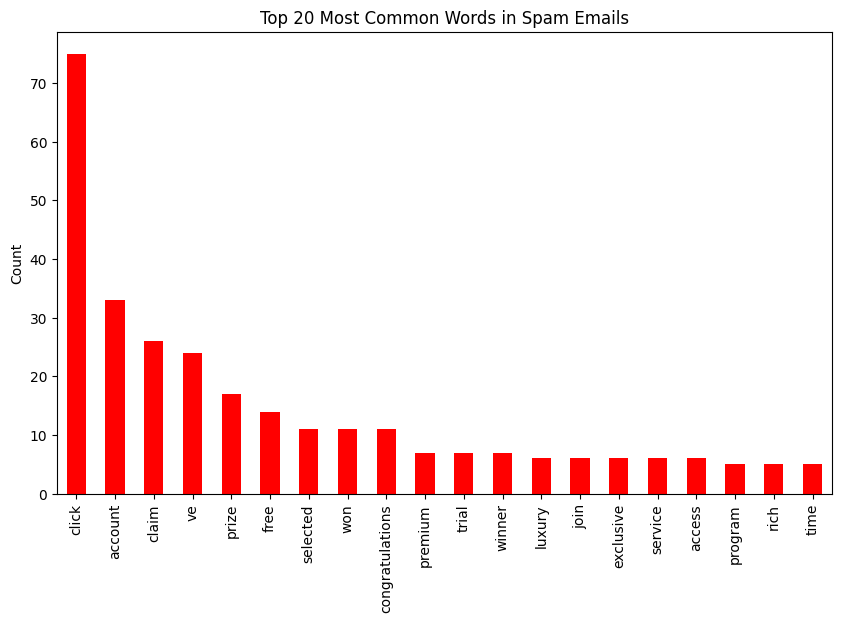

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X_ham = vectorizer.fit_transform(df[df['label'] == 'ham']['email'])
X_spam = vectorizer.fit_transform(df[df['label'] == 'spam']['email'])

# Convert to dfFrame for easy plotting
df_ham = pd.DataFrame(X_ham.toarray(), columns=vectorizer.get_feature_names_out())
df_spam = pd.DataFrame(X_spam.toarray(), columns=vectorizer.get_feature_names_out())

# Sum of word counts
ham_word_count = df_ham.sum().sort_values(ascending=False)
spam_word_count = df_spam.sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
ham_word_count.plot(kind='bar', color='blue')
plt.title('Top 20 Most Common Words in Ham Emails')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
spam_word_count.plot(kind='bar', color='red')
plt.title('Top 20 Most Common Words in Spam Emails')
plt.ylabel('Count')
plt.show()


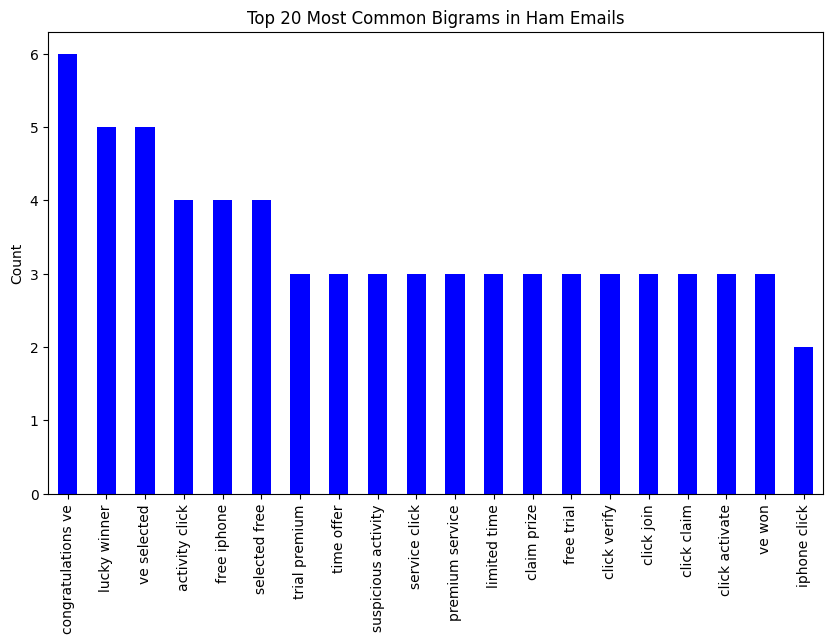

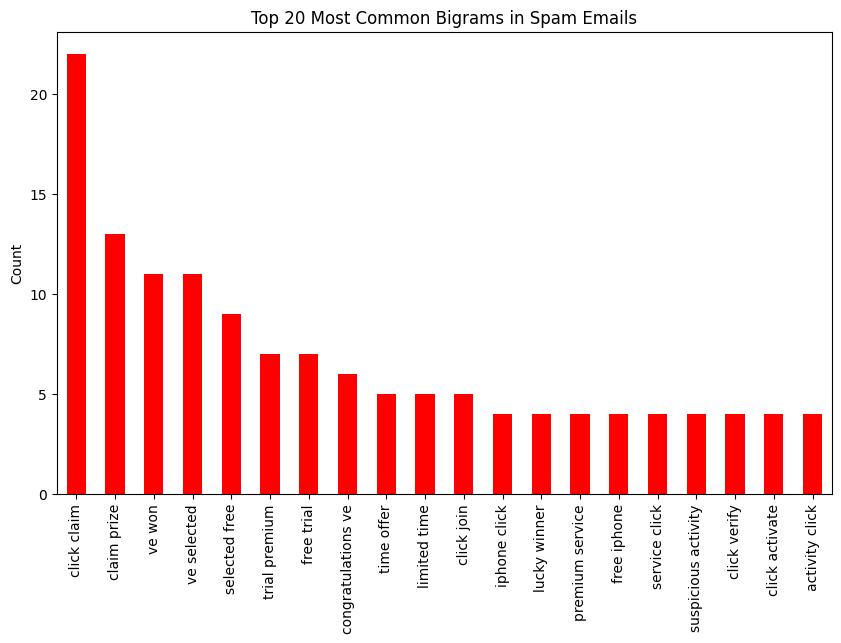

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizing bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=20)
X_ham_bigrams = bigram_vectorizer.fit_transform(df[df['label'] == 'ham']['email'])
X_spam_bigrams = bigram_vectorizer.fit_transform(df[df['label'] == 'spam']['email'])

# Convert to DataFrame
df_ham_bigrams = pd.DataFrame(X_ham_bigrams.toarray(), columns=bigram_vectorizer.get_feature_names_out())
df_spam_bigrams = pd.DataFrame(X_spam_bigrams.toarray(), columns=bigram_vectorizer.get_feature_names_out())

# Sum of bigram counts
ham_bigram_count = df_ham_bigrams.sum().sort_values(ascending=False)
spam_bigram_count = df_spam_bigrams.sum().sort_values(ascending=False)

# Plotting Bigrams
plt.figure(figsize=(10,6))
ham_bigram_count.plot(kind='bar', color='blue')
plt.title('Top 20 Most Common Bigrams in Ham Emails')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
spam_bigram_count.plot(kind='bar', color='red')
plt.title('Top 20 Most Common Bigrams in Spam Emails')
plt.ylabel('Count')
plt.show()

In [80]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [82]:
# SVM Model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [83]:
# Evaluation
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.96      0.93      0.95        28

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.96      0.98        28

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



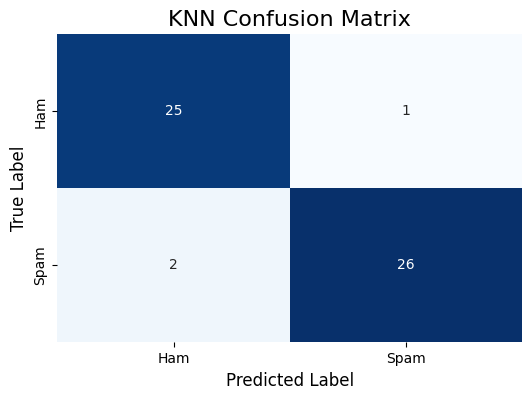

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'{model_name} Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, 'KNN')


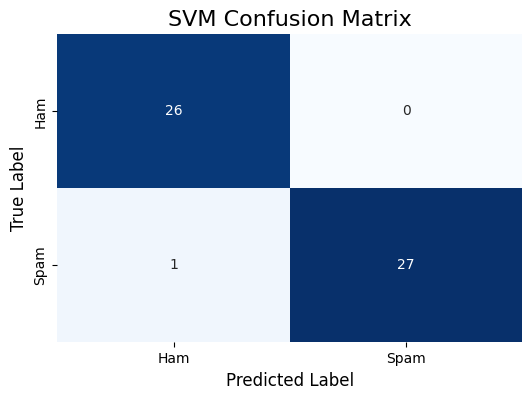

In [85]:
# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, 'SVM')